# Introduction

Netflix is a popular streaming service that offers a wide variety of TV shows, movies, documentaries, and more on thousands of internet-connected devices. You can watch as much as you want, whenever you want, without a single commercial – all for one low monthly price. There's always something new to discover, and new TV shows and movies are added every week!

![](https://pyxis.nymag.com/v1/imgs/da8/fec/5edf63ed6bb053c830dc532fe840685231-hacks-netflix-01.jpg)

**What is the problem?**

Identifying the characteristics of successful Netflix original movies based on different attributes such as genre, runtime, IMDB score, and language.

**Why is it important to be solved?**

Understanding the features of successful movies can help Netflix in planning and producing more popular and well-received content, thereby attracting a larger audience and increasing its market share in the OTT platform industry.

**Data Dictionary**
*  **Title**: String - The name of the Netflix original movie.
*  **Genre**: String - The category defining the thematic elements of the movie.
*  **Premiere**: Date - The release date of the movie on Netflix.
*  **Runtime**: Integer - The length of the movie in minutes.
*  **IMDB Score**: Float - The rating given to the movie on the IMDB platform.
*  **Language**: String - The language(s) in which the movie is available.



**Questions that this case study trying to solve.**

* What is the average IMDB score for each genre?
* Which genre has the highest average runtime?
* Are longer movies rated higher on IMDB?
* What is the distribution of movies across different languages?
* What is the trend in the number of releases over the years?
* Which year had the highest average IMDB score?
* Are movies in certain languages rated higher on average?
* What is the distribution of IMDB scores?
* What is the most common genre on Netflix?
* What is the average runtime of movies released in different months?



In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the file
df = pd.read_csv(r"/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv", encoding="ISO-8859-1")
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [4]:
df["Premiere"] = df["Premiere"].str.replace( ".",",")

In [5]:
df['Premiere'] = pd.to_datetime(df['Premiere'], format='%B %d, %Y')

In [6]:
df['Premiere Year'] = df['Premiere'].dt.year
df['Premiere Month'] = df['Premiere'].dt.month

In [7]:
df.duplicated().sum() #checking whether the dataset have any duplicates

0

# What is the average IMDB score for each genre?

In [8]:
avgimdbbygenres = df.groupby("Genre").agg({"IMDB Score": "mean"}).sort_values(by = "IMDB Score", ascending = False).reset_index()
avgimdbbygenres

,Genre,IMDB Score
0,Animation/Christmas/Comedy/Adventure,8.200000
1,Musical / Short,7.700000
2,Concert Film,7.633333
3,Anthology/Dark comedy,7.600000
4,Animation / Science Fiction,7.500000
...,...,...
110,Superhero-Comedy,4.400000
111,Political thriller,4.300000
112,Horror anthology,4.300000
113,Musical/Western/Fantasy,3.900000


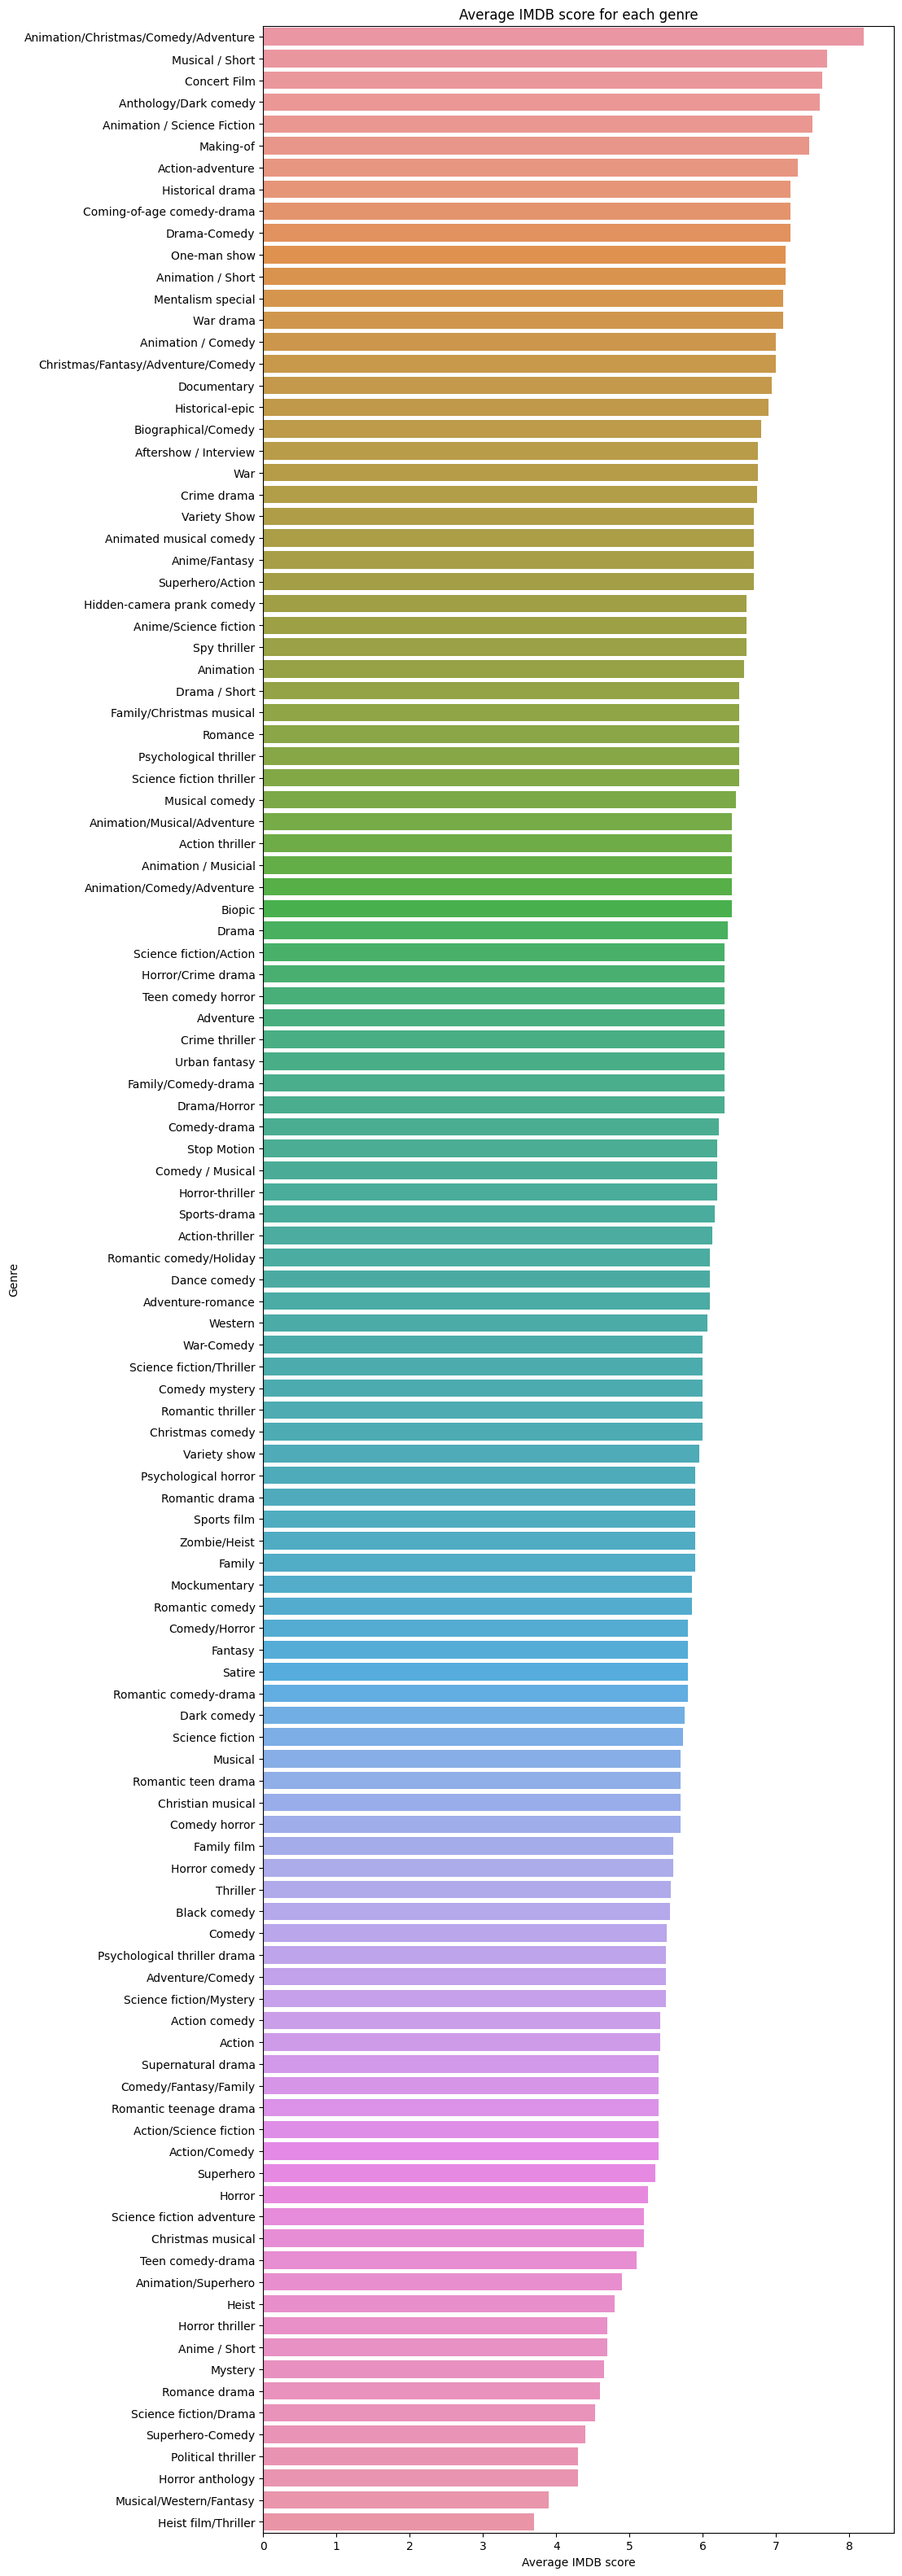

In [9]:
plt.figure(figsize = (10,40))
sns.barplot(data = avgimdbbygenres, x = "IMDB Score", y = "Genre")
plt.title("Average IMDB score for each genre")
plt.xlabel("Average IMDB score")
plt.show()

The Animation/Christmas/Comedy/Adventure category leads with an average score of 8.20, likely due to the uplifting nature common in animation movies. Following closely is Musical/Short with an average score of 7.70, surprising given its concise format. Concert Film secures the third spot, unexpectedly performing well with its immersive experiences. Conversely, Heist film/Thriller lands at the bottom with the least average score, suggesting challenges in delivering expected suspense.

# Which genre has the highest average runtime?

In [10]:
har = df.groupby("Genre").agg({"Runtime": "mean"}).sort_values(by = "Runtime", ascending = False).reset_index()
har

,Genre,Runtime
0,Heist film/Thriller,149.000000
1,Anthology/Dark comedy,149.000000
2,Zombie/Heist,148.000000
3,War drama,145.500000
4,Horror anthology,144.000000
...,...,...
110,Aftershow / Interview,23.666667
111,Drama / Short,17.000000
112,Musical / Short,15.000000
113,Animation / Short,10.750000


In [11]:
har["Genre"][0:2]

0      Heist film/Thriller
1    Anthology/Dark comedy
Name: Genre, dtype: object

In [12]:
"Heist film/Thriller & Anthology/Dark comedy have the highest average runtime"

'Heist film/Thriller & Anthology/Dark comedy have the highest average runtime'

# Are longer movies rated higher on IMDB?

In [13]:
px.scatter(data_frame=df, x = "Runtime", y = "IMDB Score", trendline="ols")

In [14]:
df["Runtime"].corr(df["IMDB Score"])

-0.04089629142078858

The correlation coefficient of -0.04 indicates a negligible negative relationship between movie runtime and IMDB score. This suggests that, overall, there is little to no discernible impact of runtime on viewer perception of a movie's quality as measured by IMDB scores. Therefore, factors other than runtime, such as plot, acting, and directing, likely play more significant roles in determining viewer ratings on IMDB.

# What is the distribution of movies across different languages?

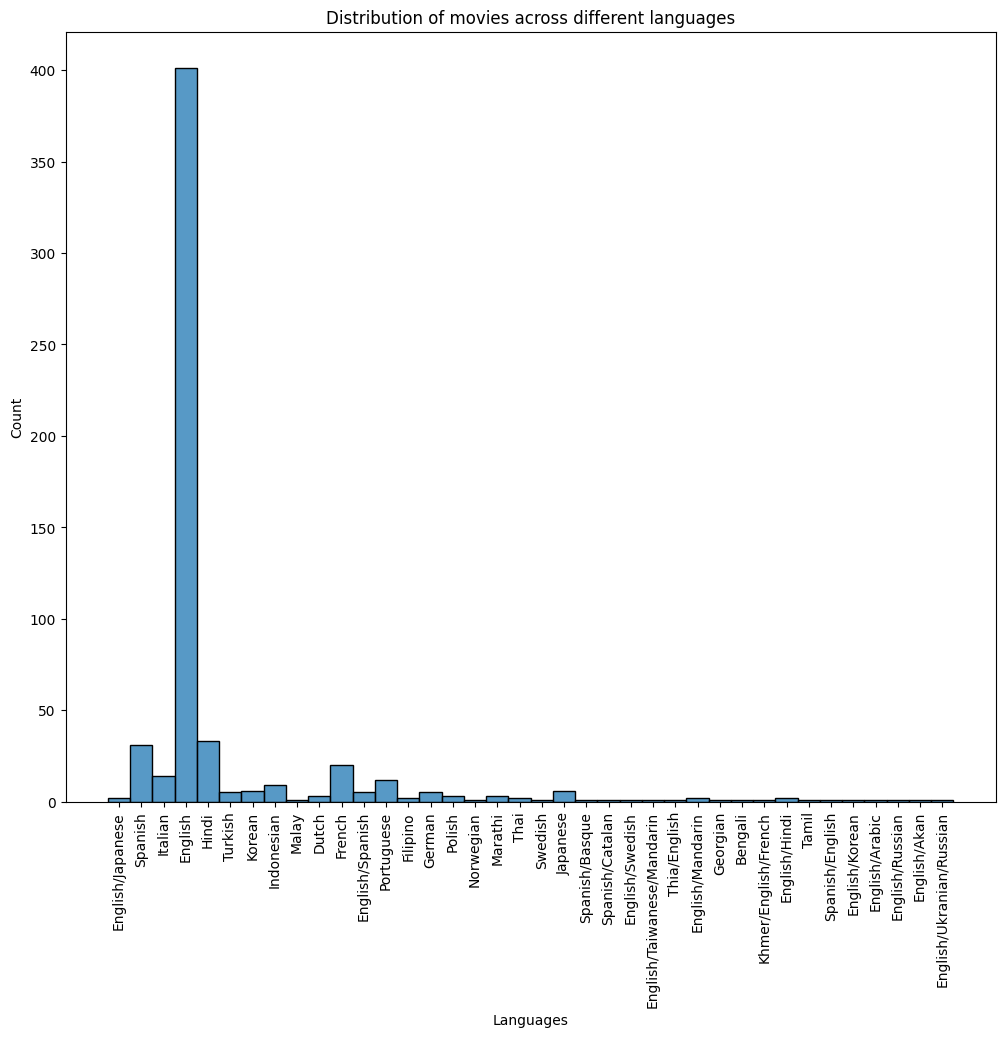

In [15]:
plt.figure(figsize = (12,10))
sns.histplot(df,x= "Language")
plt.title("Distribution of movies across different languages")
plt.xlabel("Languages")
plt.xticks(rotation = "vertical")
plt.show()

It is evident that English-language movies dominate Netflix's content library.

# What is the trend in the number of releases over the years?

In [16]:
toy = df["Premiere Year"].value_counts().reset_index()
toy

,Premiere Year,count
0,2020,183
1,2019,125
2,2018,99
3,2021,71
4,2017,66
5,2016,30
6,2015,9
7,2014,1


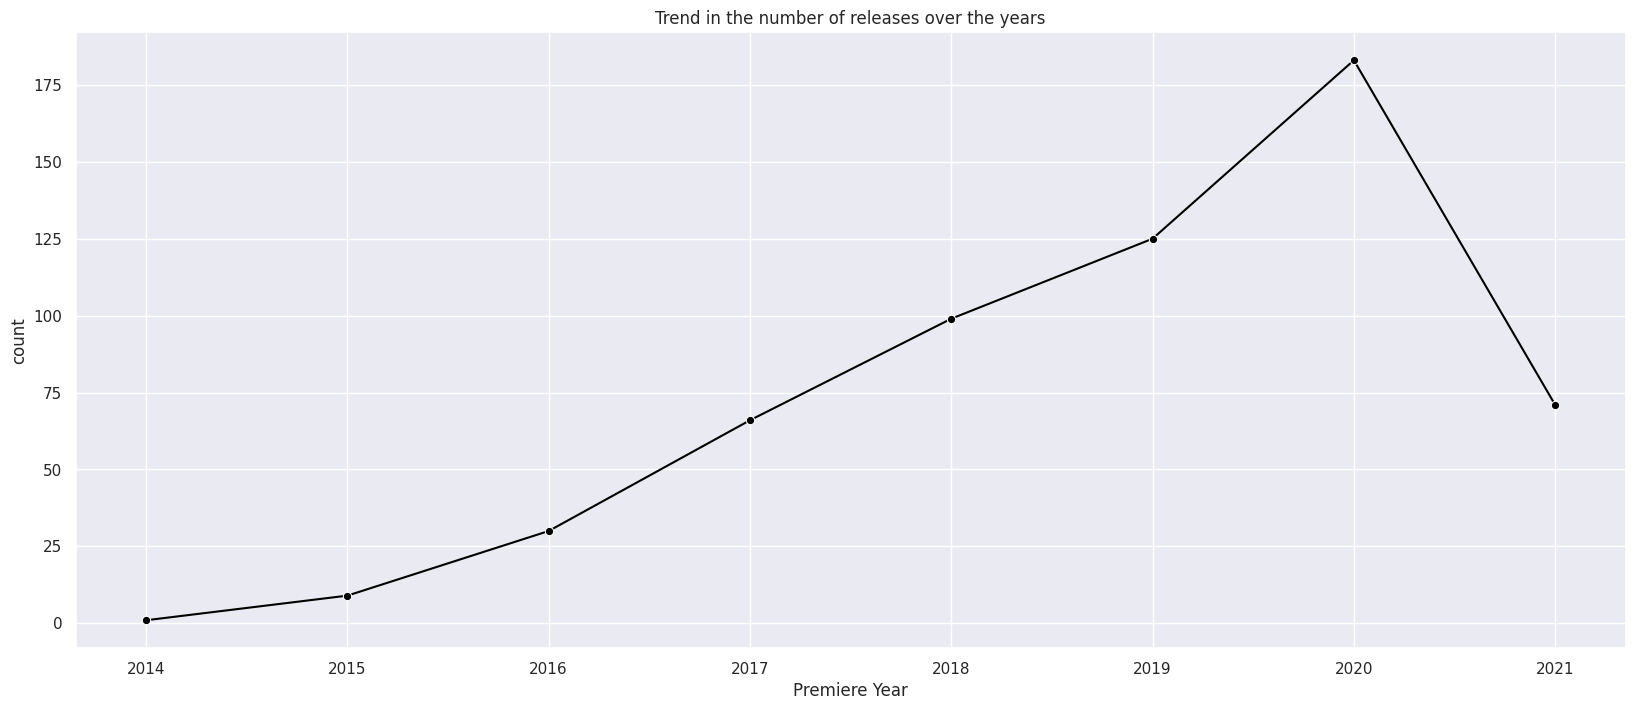

In [17]:
plt.figure(figsize = (20,8))
sns.set_theme(style="darkgrid")
sns.lineplot(toy,x= "Premiere Year", y = "count", marker = 'o', color = "black")
plt.title("Trend in the number of releases over the years")
plt.show()

The data shows a clear rise in the number of Netflix original movie releases over the years. 2020 stands out with the highest count of 183 releases, followed closely by 2019 and 2018. This likely reflects Netflix's strategic focus on expanding its original content library to meet the demands of its growing audience and competitive market.

# Which year had the highest average IMDB score?

In [18]:
yai = df.groupby("Premiere Year").agg({"IMDB Score": "mean"}).sort_values(by = "IMDB Score", ascending = False).reset_index()
yai

,Premiere Year,IMDB Score
0,2015,6.877778
1,2016,6.513333
2,2017,6.422727
3,2014,6.400000
4,2018,6.360606
5,2019,6.259200
6,2020,6.195082
7,2021,6.046479


2015 had the highest average IMDB score

# Are movies in certain languages rated higher on average?

In [19]:
lai = df.groupby("Language").agg({"IMDB Score": "mean"}).sort_values(by = "IMDB Score", ascending = False).reset_index()
lai

,Language,IMDB Score
0,English/Ukranian/Russian,8.400000
1,English/Akan,7.700000
2,English/Hindi,7.300000
3,English/Arabic,7.300000
4,English/Korean,7.300000
5,English/Russian,7.300000
6,Spanish/English,7.300000
7,Khmer/English/French,7.200000
8,Tamil,7.200000
9,Bengali,7.100000


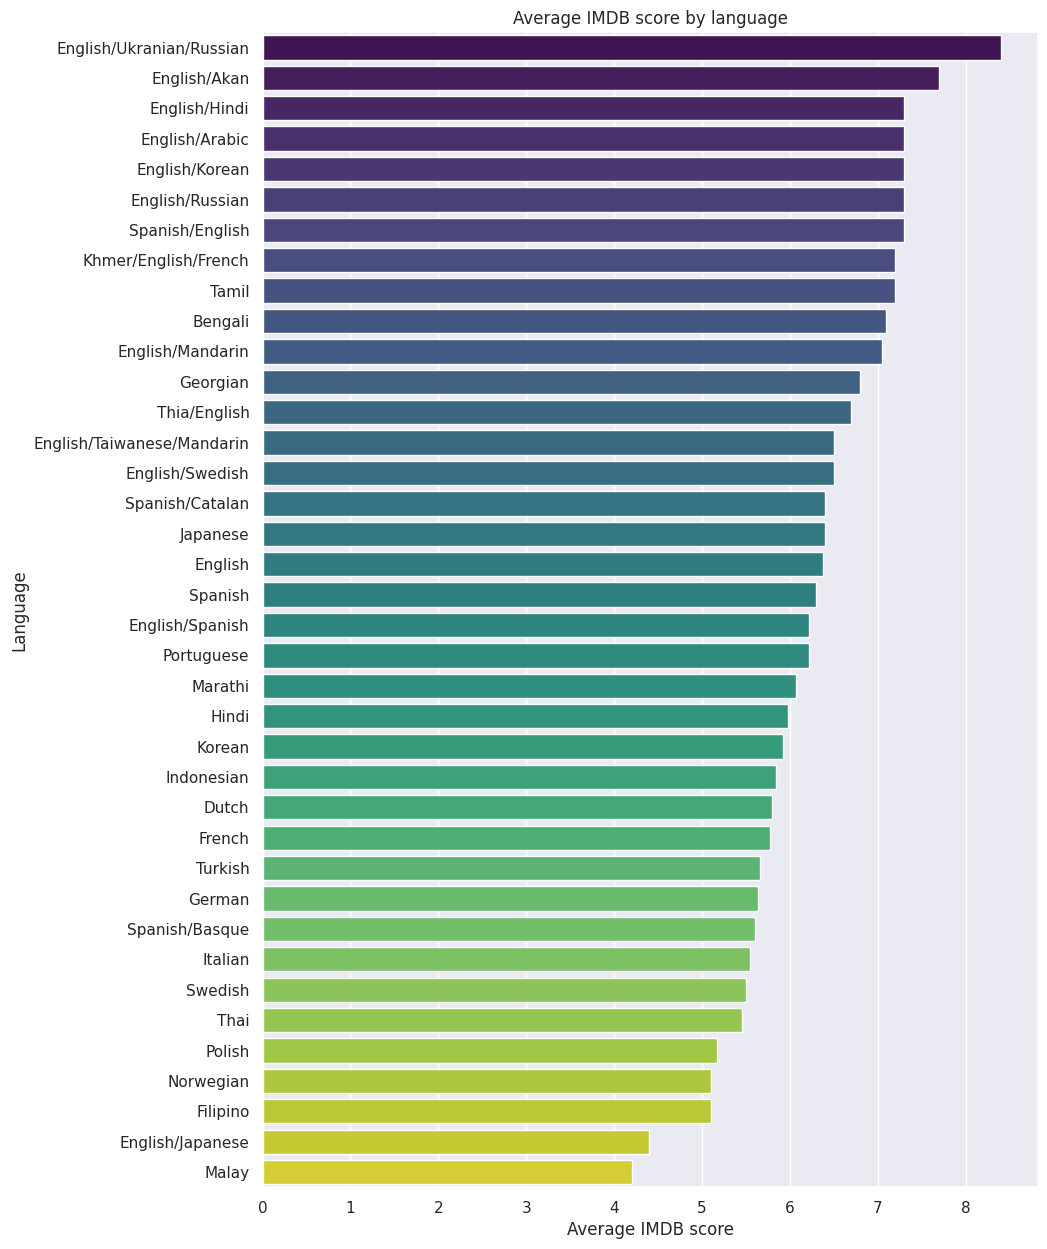

In [20]:
plt.figure(figsize = (10,15))
sns.barplot(data = lai, x = "IMDB Score", y = "Language", palette="viridis")
plt.title("Average IMDB score by language")
plt.xlabel("Average IMDB score")
plt.show()

The data illustrates diverse language representation in Netflix original movies, with varying average IMDB scores. While some combinations like English/Ukrainian/Russian receive high ratings, others, like Malay, have lower scores. This underscores the importance of linguistic diversity in Netflix's content strategy and the need for targeted investments for global viewer satisfaction.

# What is the distribution of IMDB scores?

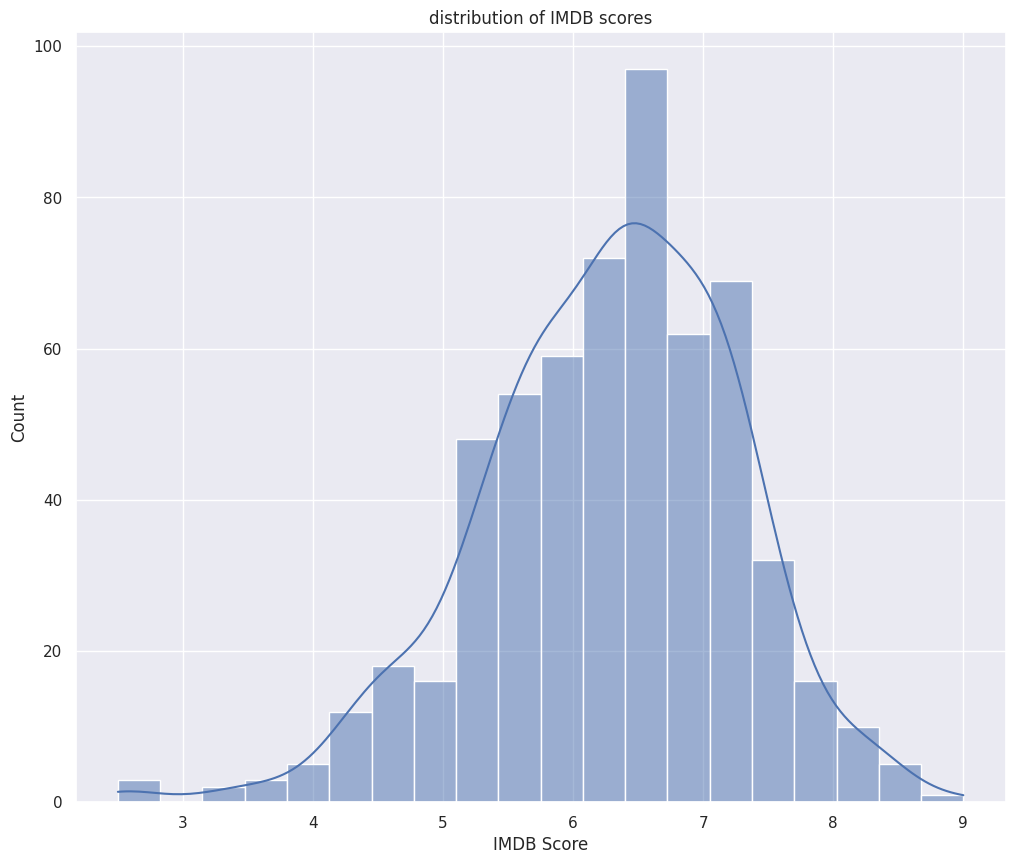

In [21]:
plt.figure(figsize = (12,10))
sns.histplot(df,x= "IMDB Score", bins = 20, kde = True)
plt.title("distribution of IMDB scores")
plt.show()

The data shows a prominent peak around an IMDb score of 7, indicating that a significant number of movies fall within this range. The distribution appears symmetrical, with a slight skew towards lower scores, suggesting a balanced spread of ratings. Most movies on Netflix receive scores between 5 and 8, indicating that the majority are rated as average to above-average. Additionally, there are fewer movies with extreme scores (above 8 or below 4), highlighting a scarcity of exceptional or poorly rated films.

# What is the most common genre on Netflix?

In [22]:
mostcommongenre = df["Genre"].value_counts().idxmax()
"The most common genre on Netflix is {}".format(mostcommongenre)

'The most common genre on Netflix is Documentary'

# What is the average runtime of movies released in different months?

In [23]:
arm = df.groupby("Premiere Month").agg({"Runtime": "mean"}).sort_values(by = "Premiere Month").reset_index()
arm

,Premiere Month,Runtime
0,1,94.459459
1,2,96.410256
2,3,94.229167
3,4,94.380952
4,5,92.150943
5,6,101.171429
6,7,96.882353
7,8,86.972973
8,9,87.264151
9,10,94.324675


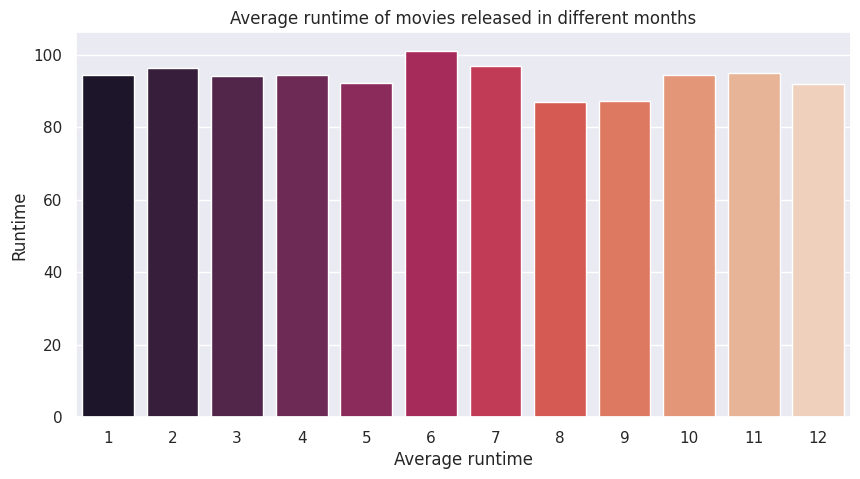

In [24]:
plt.figure(figsize = (10,5))
sns.barplot(data = arm, x = "Premiere Month", y = "Runtime", palette="rocket")
plt.title("Average runtime of movies released in different months")
plt.xlabel("Average runtime")
plt.show()

The graph showcases varying runtimes, ranging from about 86 to 101 minutes, across different months. 

# Conclusion

In conclusion, our analysis of Netflix original movies has revealed several noteworthy insights. Firstly, the Animation/Christmas/Comedy/Adventure category emerges as the top performer with an impressive average score of 8.20, likely owing to the uplifting nature typical of animated films. Surprisingly, the Musical/Short genre closely follows with an average score of 7.70, despite its concise format. Additionally, Concert Films unexpectedly secure the third spot, showcasing strong performance due to their immersive experiences. Conversely, Heist film/Thriller ranks lowest in average score, indicating potential challenges in delivering expected suspense.

Moreover, our findings suggest that runtime has little to no discernible impact on viewer perception of movie quality, as indicated by the negligible negative correlation coefficient of -0.04 between runtime and IMDB score. This emphasizes that factors such as plot, acting, and directing play more significant roles in determining viewer ratings.

Furthermore, it's evident that English-language movies dominate Netflix's content library, reflecting the platform's global appeal. The data also reveals a clear upward trend in the number of Netflix original movie releases over the years, highlighting Netflix's strategic focus on expanding its original content library to cater to its growing audience and competitive market.

Interestingly, 2015 stands out with the highest average IMDB score, suggesting a particularly successful year for Netflix original movies. Additionally, our analysis underscores the importance of linguistic diversity in Netflix's content strategy, with varying average IMDB scores observed across different language combinations.

Furthermore, the distribution of IMDB scores indicates a prominent peak around a score of 7, with a symmetrical spread suggesting a balanced distribution of ratings. Most Netflix original movies fall within the 5 to 8 score range, indicating that the majority are perceived as average to above-average by viewers.

Lastly, the most common genre on Netflix is Documentary, showcasing the platform's commitment to offering diverse content. Additionally, our analysis of average runtimes across different premiere months reveals varying durations, suggesting a lack of seasonal trends in movie durations.

Overall, these insights provide valuable guidance for Netflix in content planning, production, and audience targeting, ensuring the continued success and growth of its original content offerings.